In [1]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('data/diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75832 entries, 0 to 75831
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   encounter_id              75832 non-null  float64
 1   patient_nbr               75832 non-null  float64
 2   race                      75832 non-null  object 
 3   gender                    75832 non-null  object 
 4   age                       75832 non-null  object 
 5   weight                    75832 non-null  object 
 6   admission_type_id         75832 non-null  float64
 7   discharge_disposition_id  75832 non-null  float64
 8   admission_source_id       75832 non-null  float64
 9   time_in_hospital          75832 non-null  float64
 10  payer_code                75832 non-null  object 
 11  medical_specialty         75832 non-null  object 
 12  num_lab_procedures        75832 non-null  float64
 13  num_procedures            75832 non-null  float64
 14  num_me

In [3]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,7.583200e+04,7.583200e+04,75832.000000,75832.000000,75832.000000,75832.000000,75832.000000,75832.000000,75832.000000,75832.000000,75832.000000,75832.000000,75832.000000
mean,1.162530e+08,4.659672e+07,2.125831,3.949876,5.866798,4.477015,43.141207,1.339369,15.743130,0.320261,0.166711,0.623985,7.196566
std,5.813977e+07,3.571536e+07,1.527104,5.610895,4.348319,3.031160,19.123581,1.681773,8.151756,1.160432,0.729874,1.239269,1.980746
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,6.807618e+07,1.780539e+07,1.000000,1.000000,1.000000,2.000000,32.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.176942e+08,4.075393e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,14.000000,0.000000,0.000000,0.000000,8.000000
75%,1.629026e+08,8.354232e+07,3.000000,5.000000,7.000000,6.000000,56.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,2.281685e+08,1.152185e+08,8.000000,28.000000,22.000000,14.000000,129.000000,6.000000,81.000000,42.000000,42.000000,21.000000,9.000000


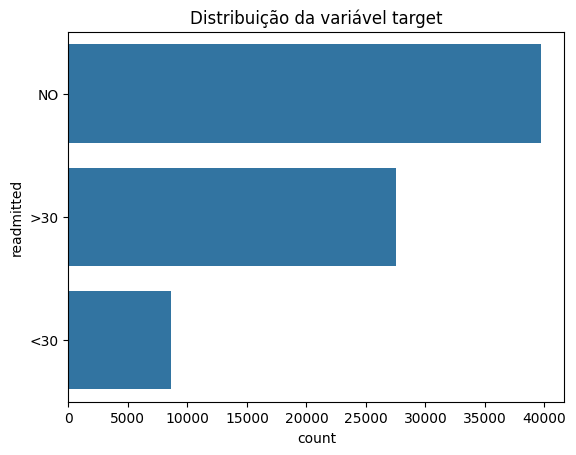

In [4]:
# Plotagem da distribuição da variavel target
sns.countplot(df['readmitted'])
plt.title('Distribuição da variável target')
plt.show()

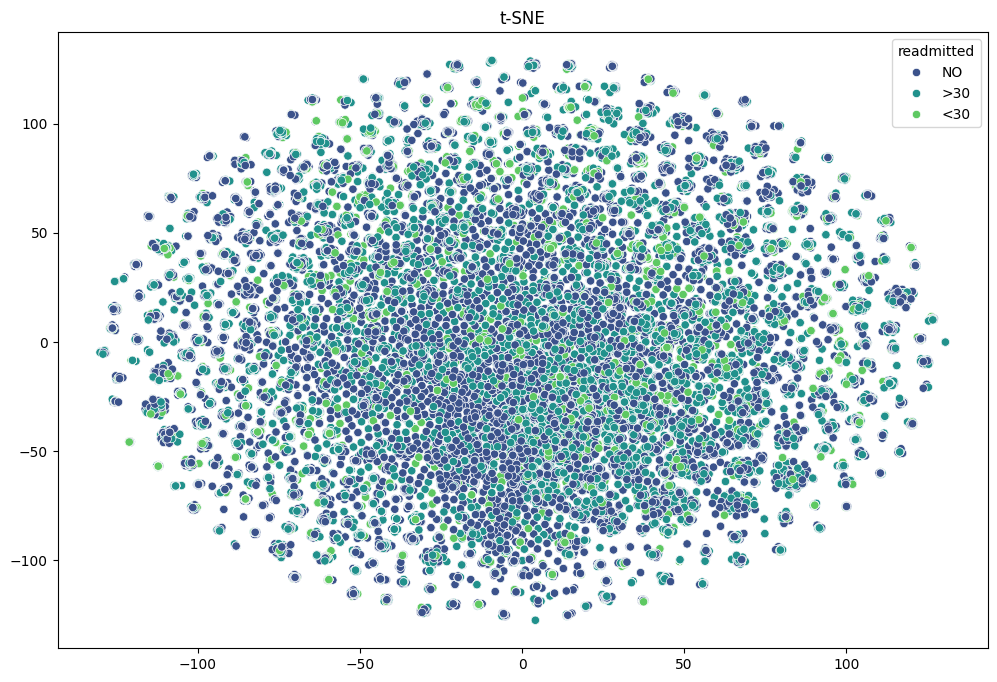

In [ ]:
from sklearn.manifold import TSNE

# Supondo que df seja o seu DataFrame original
X = df.drop('readmitted', axis=1)
y = df['readmitted']

# Identificando colunas categóricas
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Aplicando OneHotEncoder para transformar variáveis categóricas
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Padronizando as variáveis independentes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Reduzindo a dimensionalidade
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plotando o gráfico
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='viridis')
plt.title('t-SNE')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


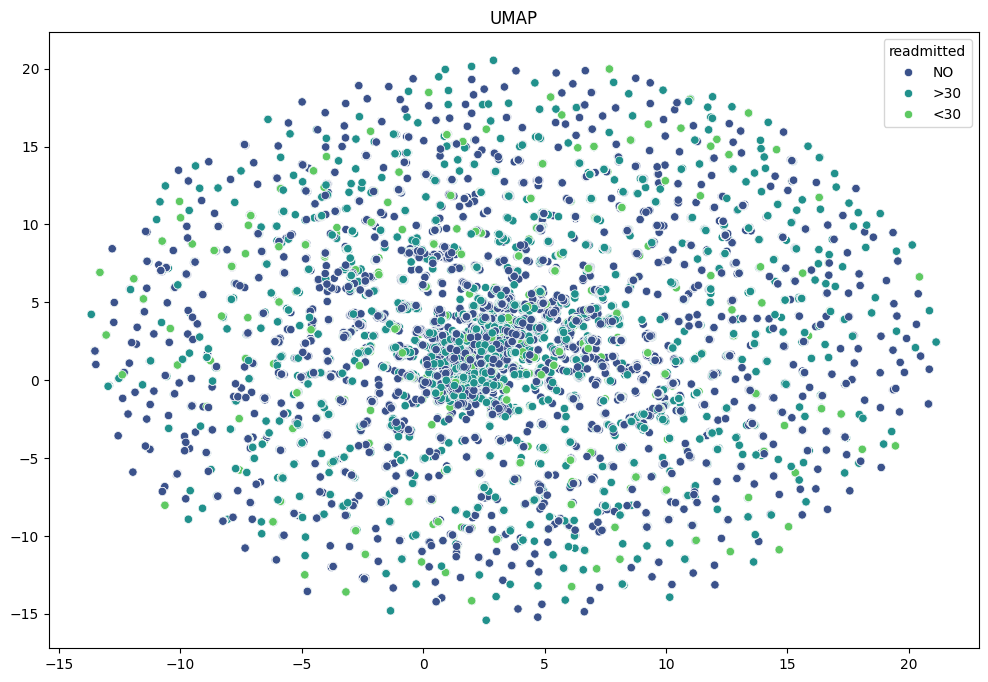

In [ ]:
import umap

# Supondo que df seja o seu DataFrame original
X = df.drop('readmitted', axis=1)
y = df['readmitted']

# Identificando colunas categóricas
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Aplicando OneHotEncoder para transformar variáveis categóricas
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Padronizando as variáveis independentes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Reduzindo a dimensionalidade com UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X_scaled)

# Plotando o gráfico
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y, palette='viridis')
plt.title('UMAP')
plt.show()
